In [14]:
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

In [15]:
gold_df = pd.read_csv('input\Gold Price.csv')
gold_price = gold_df['USD (PM)'].values
diff = np.hstack((np.array([gold_price[1]-gold_price[0]]),np.diff(gold_price,1)))
ret = diff/np.array(gold_price)
ret = np.power(ret,2)
ret = ret.reshape(-1,1)

In [16]:
t = adfuller(ret)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output


,value
Test Statistic Value,-6.292154
p-value,0.0
Lags Used,12
Number of Observations Used,1252
Critical Value(1%),-3.435584
Critical Value(5%),-2.863851
Critical Value(10%),-2.568001


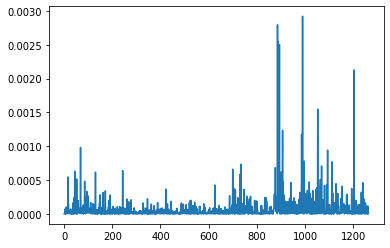

In [17]:
plt.plot(ret)

In [18]:
seq_len = 6

gold_scaler = MinMaxScaler(feature_range=(-1, 1))
x = gold_scaler.fit_transform(ret)
result_pred = []
for i in tqdm(range(seq_len, len(gold_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 1259/1259 [11:25<00:00,  1.84it/s]


4.604783148454008e-08

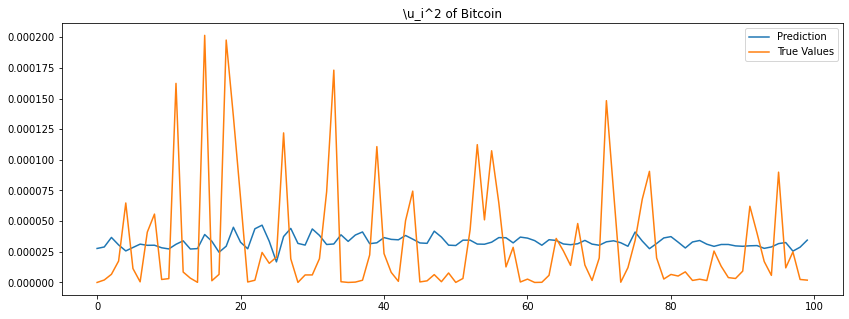

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)).flatten()[500:600], label = 'Prediction')
plt.plot(gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)).flatten()[500:600], label = 'True Values')
plt.legend()
plt.title(r'\u_i^2 of Bitcoin')
plt.show()

In [20]:
# gold_df['pred'] = gold_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
# gold_df.to_csv('ARIMA_pred_gold.csv')

In [21]:
seq_len = 6

bit_df = pd.read_csv('input\Bitcoin Price.csv')
bit_scaler = MinMaxScaler(feature_range=(-1, 1))
x = bit_scaler.fit_transform(bit_df['Value'].values.reshape(-1, 1))
result_pred = []
for i in tqdm(range(seq_len, len(bit_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 1820/1820 [15:30<00:00,  1.96it/s]


687069.9513036781

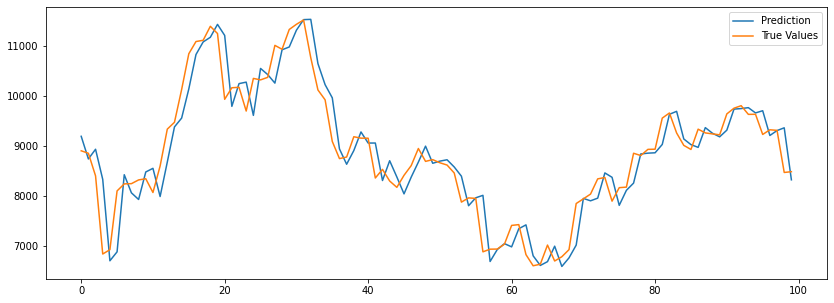

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)[500:600]).flatten(), label = 'Prediction')
plt.plot(bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)[500:600]).flatten(), label = 'True Values')
plt.legend()
plt.show()

In [23]:
# gold_df['pred'] = gold_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
# gold_df.to_csv('ARIMA_pred_gold.csv')